Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Saturday and are supposed to be solved in groups of three. They have to be handed in before Sunday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before the end of **Saturday, November 07, 2020**. Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Each gray value of a pixel in an image is replaced by a new gray value which is computed dependend on the surroundings of the original pixel. Based on this procedure different filters are feasible. Therefore different kernels and kernel sizes are available. These parameters define how the surrounding pixels are computed.  

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

Convolution is linear, because every gray value of a pixel is recalculated in the same way dependend on the kernel and the kernel size. The conditions for linearity are met: You can multiply the grey values before or after the convolution and still get the same result. Furthermore you can overlay two images before or after convolution and get the same results (as long as there is not dataloss).

Convolution is homogenous, because a homogenous function meets the following equation:

f(λx1, ... λxn) = λ^r f(x1,... , xn)

If you plug in the λ for every variable you can exclude it again. This means the function is homogenous.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

Concrete example:

M=512, N=512,
k = 3×3

Additions per pixel: ((2𝑚+1)×(2𝑛+1)) - 1 = (3 * 3) - 1 = 8

Multiplications per pixel: (2𝑚+1)×(2𝑛+1) = 3 * 3 = 9

Pixels per image: M × N = 512 * 512 = 262.144

Operations = (Additions per pixel + Multiplications per pixel) × Pixels per image = (8 + 9) * 262.144 = 4.456.448

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

A seperable kernel can be defined by the product of a row and a coloumn vector. This reduces the computational effort of the convolution tremendously. 

How does it exactly work?



## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

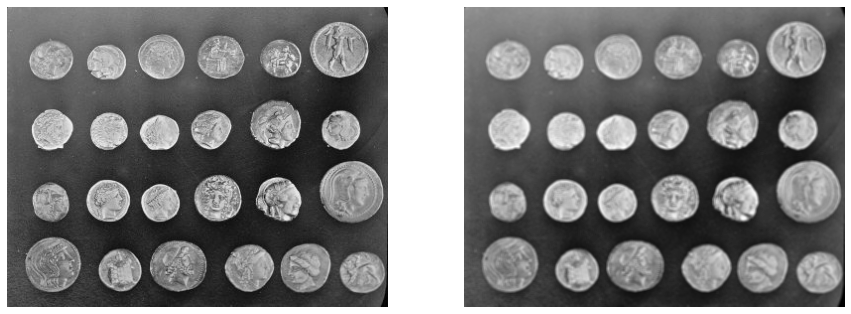

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sci     #library ndimage of the package scipy necessary 
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
#definition of box filter kernel -> used for smoothing, noise reduction
rows = 3
coloumns = 3
box_filter_kernel = 1/(rows*coloumns) * np.ones((rows, coloumns))
        
#appyling the box filter - effect: blurs the picture
filtered_image = sci.filters.convolve(image, box_filter_kernel)
        
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

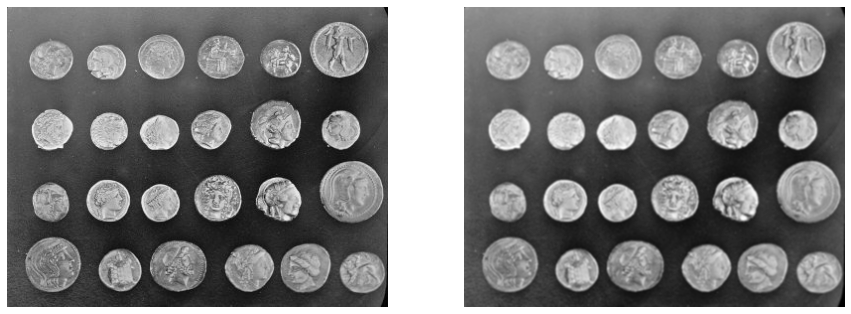

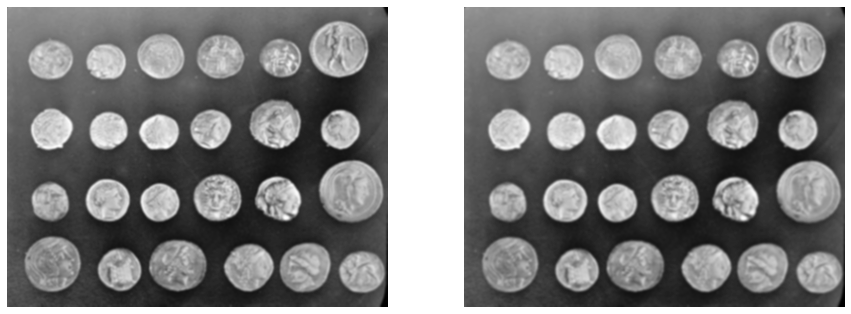

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sci     #library ndimage of the package scipy necessary 
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
#definition of gaussian filter kernels -> used for smoothing, noise reduction -> exspecially to make "hard" borders of box-filter smooth
gaussian_filter_kernel_1 = 1/16 * np.array([[1, 2, 1],
                                            [2, 4, 2],
                                            [1, 2, 1]])
gaussian_filter_kernel_2 = 1/64 * np.array([[1, 3, 3, 1],
                                            [3, 9, 9, 3],
                                            [3, 9, 9, 3],
                                            [1, 3, 3, 1]])
gaussian_filter_kernel_3 = 1/256 * np.array([[1, 4, 6, 4, 1],
                                             [4, 16, 24, 16, 4],
                                             [6, 24, 36, 24, 6],
                                             [4, 16, 24, 16, 4],
                                             [1, 4, 6, 4, 1]])
        
#appyling the gaussian filters - effect: the blurring increases with the size of the kernel
filtered_image_1 = sci.filters.convolve(image, gaussian_filter_kernel_1)
filtered_image_2 = sci.filters.convolve(image, gaussian_filter_kernel_2)
filtered_image_3 = sci.filters.convolve(image, gaussian_filter_kernel_3)

fig_1 = plt.figure(figsize=(15,7))
a=fig_1.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig_1.add_subplot(1,2,2)
plt.imshow(filtered_image_1, cmap = 'gray')
plt.axis('off')
plt.show()

fig_2 = plt.figure(figsize=(15,7))
a=fig_2.add_subplot(1,2,1)
plt.imshow(filtered_image_2, cmap = 'gray')
plt.axis('off')
a=fig_2.add_subplot(1,2,2)
plt.imshow(filtered_image_3, cmap = 'gray')
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

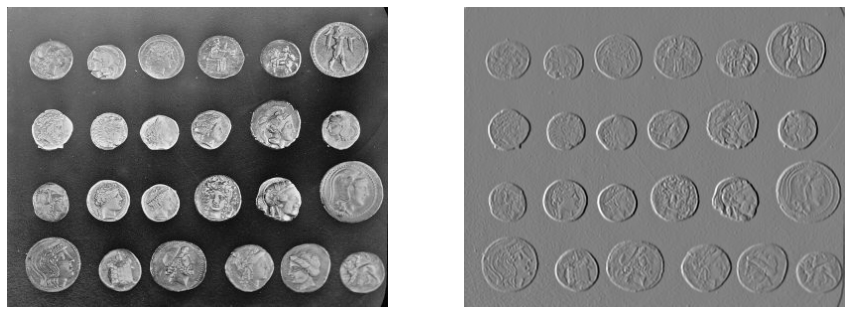

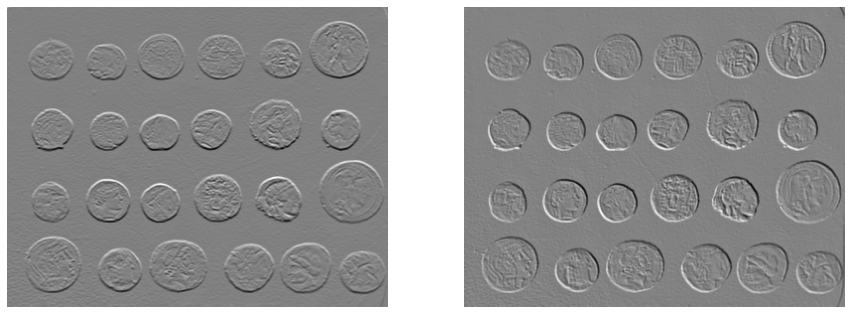

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sci     #library ndimage of the package scipy necessary 
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
#definition of sobel filter kernels -> used to find strength and direction of edges by detecting gray value jumps
horizontal_sobel_kernel = 1/4 * np.array([[1, 0, -1],  #different direction of edge strengthing by changing the left and right coloumn
                                          [2, 0, -2],
                                          [1, 0, -1]])
vertical_sobel_kernel = 1/4 * np.array([[1, 2, 1],     #different direction of edge strengthing by changing the upper and lower row
                                        [0, 0, 0],
                                        [-1, -2, -1]])
diagonal_sobel_kernel = 1/4 * np.array([[0, -1, -2],   #different direction of edge strengthing by changing the corners (4 possibilities)
                                        [1, 0, -1],
                                        [2, 1, 0]])

#appyling the sobel filters
filtered_image_1 = sci.filters.convolve(image, horizontal_sobel_kernel)
filtered_image_2 = sci.filters.convolve(image, vertical_sobel_kernel)
filtered_image_3 = sci.filters.convolve(image, diagonal_sobel_kernel)

print()

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image_1, cmap = 'gray')
plt.axis('off')
plt.show()

fig_2 = plt.figure(figsize=(15,7))
a=fig_2.add_subplot(1,2,1)
plt.imshow(filtered_image_2, cmap = 'gray')
plt.axis('off')
a=fig_2.add_subplot(1,2,2)
plt.imshow(filtered_image_3, cmap = 'gray')
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


Why is Unsharp Masking sharpening an image?

A: The original gray value of a pixel is the basis for a correction. To this basis the difference of the original gray value and the gray value "smoothed" by the Gaussian filter ("average of the current kernel"), multiplied by a adjustable scaling factor, is added. This increases exspecially the sharpness of edges in the image. Because the contrast of the original pixel compared to its surroundings is increased. With a high value for the amount this is pretty well visible.

What is the difference between normalizing and clipping an image?

A: Normalizing: Rescales the gray values to a "new" different scale -> e.g. former 255 now corresponds to 127, 254 to 126,5 etc. Very popular for image enhancement: Normalizing the frequency of each gray value of an image to a probability (summing up to 1).

Clipping: The gray values outside of predefined boundaries (in this example 0 and 255) are "clipped" which means that they are set to the respective boundary value (<0=0, >255=255).

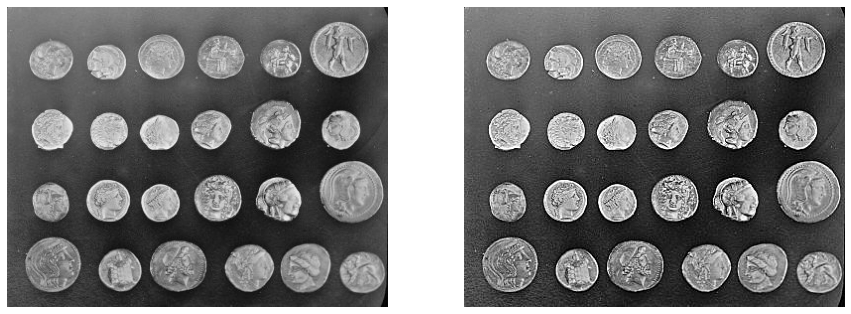

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sci     #library ndimage of the package scipy necessary 
from imageio import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE
unsharped_mask_image = sci.filters.convolve(image, gauss_5)

sharpened_image = image
for i in range(np.int32(sharpened_image.shape[0])):
    for j in range(np.int32(sharpened_image.shape[1])):
        sharpened_image[i][j] = image[i][j] + ((image[i][j] - unsharped_mask_image[i][j]) * amount) 
        
        if sharpened_image[i][j] < 0:
            sharpened_image[i][j] = 0
        elif sharpened_image[i][j] > 255:
            sharpened_image[i][j] = 255

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(data.coins().astype(np.float32), cmap = 'gray')    #image is somewhere overwritten and thus returns also sharpened_image, but why??
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

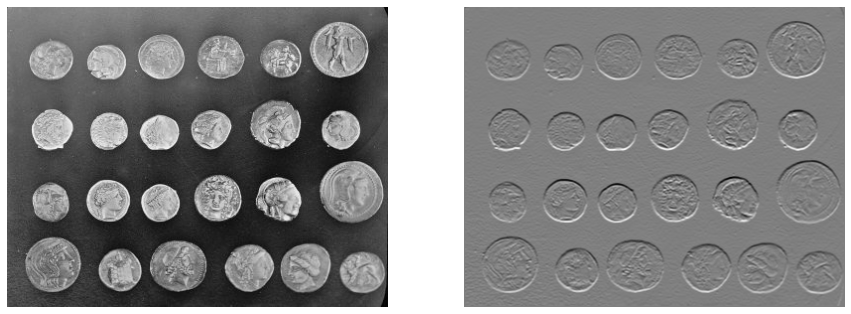

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)                 #integer division -> needed for cutting the edges
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    rows_to_cut = mh                      #cutting the picture edges to apply kernel only if enough edge pixels available
    cols_to_cut = nh
    for img_row in range(M):
        for img_col in range(N):
            #only apply the kernel if enough edge pixels are available
            if img_row >= rows_to_cut and img_row < M-rows_to_cut and img_col >= cols_to_cut and img_col < N-cols_to_cut:   # <= is not usable for the upper boundaries because this would lead to access to areas outside the picture boundaries in the line where img_patch is defined (-> mh+1 and nh+1)
                
                #slicing the necessary patch around the current pixel (same size as the kernel)
                img_patch = img[img_row-mh:img_row+(mh+1), img_col-nh:img_col+(nh+1)]    #upper boundary is EXCLUDED -> So we need to add a 1 for the upper boundary (in contrast to the lower boundary) 
            
                #applying the kernel to the patch of the image
                for ker_row in range(m):
                    for ker_col in range(n):
                        result[img_row][img_col] += img_patch[ker_row][ker_col] * kern[ker_row][ker_col]
    return result

# Load the image
image = data.coins().astype(np.float32)

rows = 3
coloumns = 3
box_filter_kernel = 1/9 * np.ones((rows, coloumns), np.float32)

gaussian_filter_kernel = 1/256 * np.array([[1, 4, 6, 4, 1],
                                           [4, 16, 24, 16, 4],
                                           [6, 24, 36, 24, 6],
                                           [4, 16, 24, 16, 4],
                                           [1, 4, 6, 4, 1]])

vertical_sobel_kernel = 1/4 * np.array([[1, 2, 1],
                                        [0, 0, 0],
                                        [-1, -2, -1]])

filtered_image = my_convolve2d(image, vertical_sobel_kernel)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()